In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
    

In [15]:
df_DS_PK = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='Pakistan')].copy()

df_DS_PK = df_DS_PK.dropna(subset=['salary_year_avg'])

df_DS_PK['salary_year_avg']


75724     157500.0
87668     109500.0
784584    157500.0
Name: salary_year_avg, dtype: float64

<Axes: >

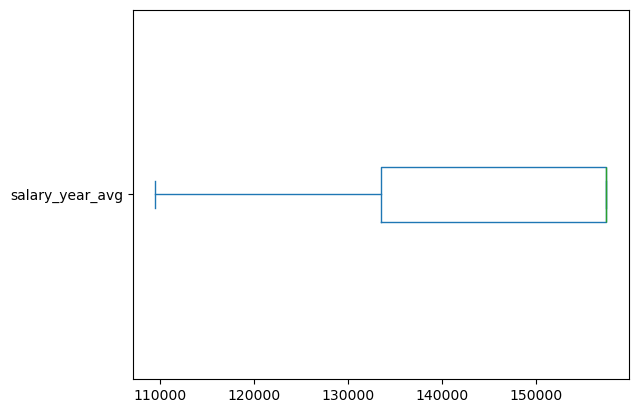

In [29]:
df_DS_PK['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\nawas\AppData\Local\Temp\ipykernel_9176\3664430479.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


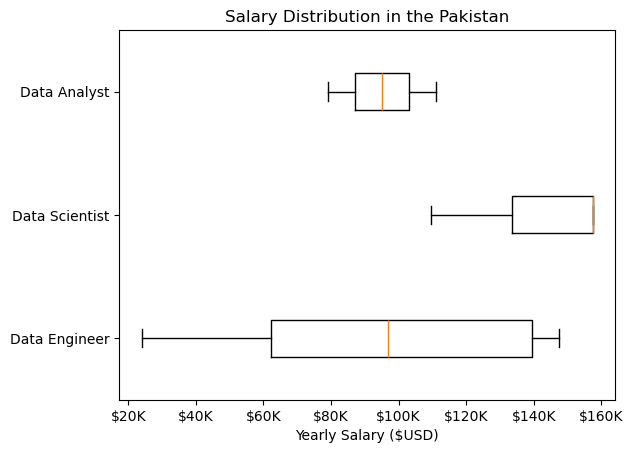

In [35]:
job_titles = ['Data Engineer','Data Scientist','Data Analyst']

df_PK = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='Pakistan')].copy()
df_PK = df_PK.dropna(subset=['salary_year_avg'])

job_list = [df_PK[df_PK['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the Pakistan')
plt.xlabel('Yearly Salary ($USD)')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.show()